In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score,confusion_matrix,classification_report)
import warnings
warnings.filterwarnings('ignore')

In [55]:
cv=pd.read_csv('car.data.csv',names=['buying','maint','doors','persons','lug_foot','safety','class'])
cv

,buying,maint,doors,persons,lug_foot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


# Data Exploration

In [56]:
cv.shape

(1728, 7)

In [57]:
cv.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_foot', 'safety', 'class'], dtype='object')

In [58]:
cv.head()

,buying,maint,doors,persons,lug_foot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [59]:
cv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null object
maint       1728 non-null object
doors       1728 non-null object
persons     1728 non-null object
lug_foot    1728 non-null object
safety      1728 non-null object
class       1728 non-null object
dtypes: object(7)
memory usage: 47.3+ KB


In [60]:
cv.dtypes

buying      object
maint       object
doors       object
persons     object
lug_foot    object
safety      object
class       object
dtype: object

In [61]:
#checking missing value
cv.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_foot    0
safety      0
class       0
dtype: int64

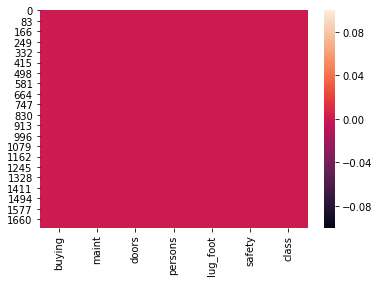

In [62]:
sns.heatmap(cv.isnull())

As we can see there is no missing value in the data sets.

In [36]:
#target data
cv['class']

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
5       unacc
6       unacc
7       unacc
8       unacc
9       unacc
10      unacc
11      unacc
12      unacc
13      unacc
14      unacc
15      unacc
16      unacc
17      unacc
18      unacc
19      unacc
20      unacc
21      unacc
22      unacc
23      unacc
24      unacc
25      unacc
26      unacc
27      unacc
28      unacc
29      unacc
        ...  
1698    unacc
1699     good
1700    vgood
1701    unacc
1702    unacc
1703    unacc
1704    unacc
1705    unacc
1706    unacc
1707    unacc
1708    unacc
1709    unacc
1710    unacc
1711      acc
1712     good
1713    unacc
1714     good
1715    vgood
1716    unacc
1717     good
1718    vgood
1719    unacc
1720      acc
1721     good
1722    unacc
1723     good
1724    vgood
1725    unacc
1726     good
1727    vgood
Name: class, Length: 1728, dtype: object

In [66]:
#counting target variables
from collections import Counter
Counter(cv['class'])

Counter({'unacc': 1210, 'acc': 384, 'vgood': 65, 'good': 69})

In [67]:
#creating a new column called 'condition'
#it contains 1,2,3 and 4.
#1-->'vgood'
#2-->'good'
#3-->'acc'
#4-->'unacc'
condition=[]
for i in cv['class']:
    if i =='vgood':
        condition.append('1')
    elif i == 'good':
        condition.append('2')
    elif i == 'acc':
        condition.append('3')
    elif i == 'unacc':
        condition.append('4')

cv['condition']=condition

In [68]:
#checking columns
cv.head()

,buying,maint,doors,persons,lug_foot,safety,class,condition
0,vhigh,vhigh,2,2,small,low,unacc,4
1,vhigh,vhigh,2,2,small,med,unacc,4
2,vhigh,vhigh,2,2,small,high,unacc,4
3,vhigh,vhigh,2,2,med,low,unacc,4
4,vhigh,vhigh,2,2,med,med,unacc,4


In [69]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
names=['buying','maint','doors','persons','lug_foot','safety','class']
for val in names:
    cv[val]=le.fit_transform(cv[val].astype(str))

In [70]:
cv.head()

,buying,maint,doors,persons,lug_foot,safety,class,condition
0,3,3,0,0,2,1,2,4
1,3,3,0,0,2,2,2,4
2,3,3,0,0,2,0,2,4
3,3,3,0,0,1,1,2,4
4,3,3,0,0,1,2,2,4


In [71]:
cv.describe()

,buying,maint,doors,persons,lug_foot,safety,class
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,1.553241
std,1.118358,1.118358,1.118358,0.816733,0.816733,0.816733,0.875948
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.750000,0.750000,0.000000,0.000000,0.000000,1.000000
50%,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,2.000000
75%,2.250000,2.250000,2.250000,2.000000,2.000000,2.000000,2.000000
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000


In [72]:
cv.corr()

,buying,maint,doors,persons,lug_foot,safety,class
buying,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.051424
maint,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.040194
doors,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-0.031327
persons,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.299468
lug_foot,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.033184
safety,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.021044
class,0.051424,0.040194,-0.031327,-0.299468,0.033184,-0.021044,1.000000


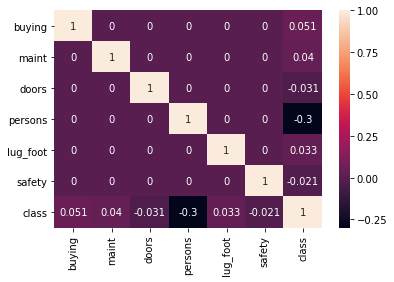

In [73]:
sns.heatmap(cv.corr(),annot=True)

In [74]:
cv['condition'].unique()

array(['4', '3', '1', '2'], dtype=object)

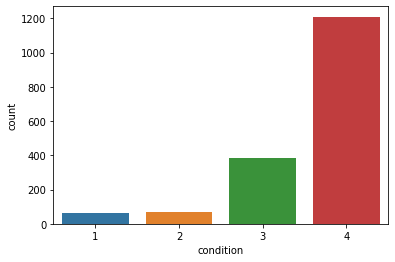

In [75]:
#plotting target variables
sns.countplot(x='condition',data=cv)

In [76]:
cv.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_foot', 'safety', 'class',
       'condition'],
      dtype='object')

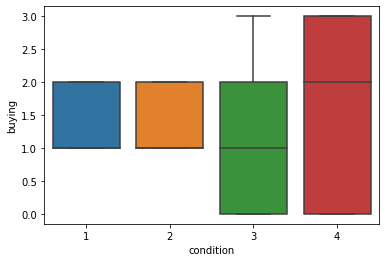

In [79]:
#checking outliers against target variable
sns.boxplot('condition','buying', data = cv)


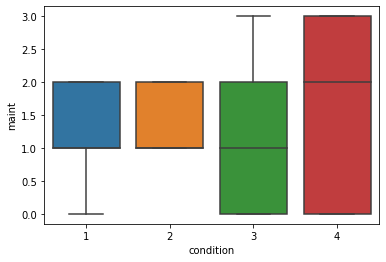

In [80]:
sns.boxplot('condition','maint', data = cv)

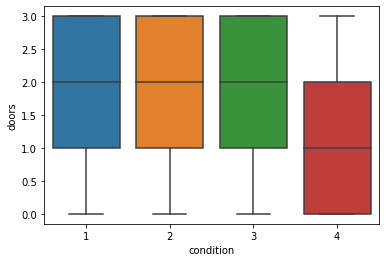

In [81]:
sns.boxplot('condition','doors', data = cv)

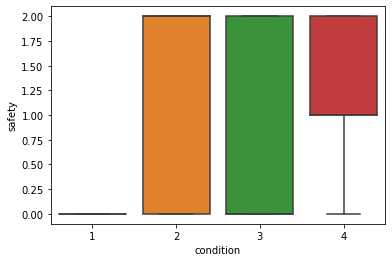

In [83]:
sns.boxplot('condition','safety', data = cv)

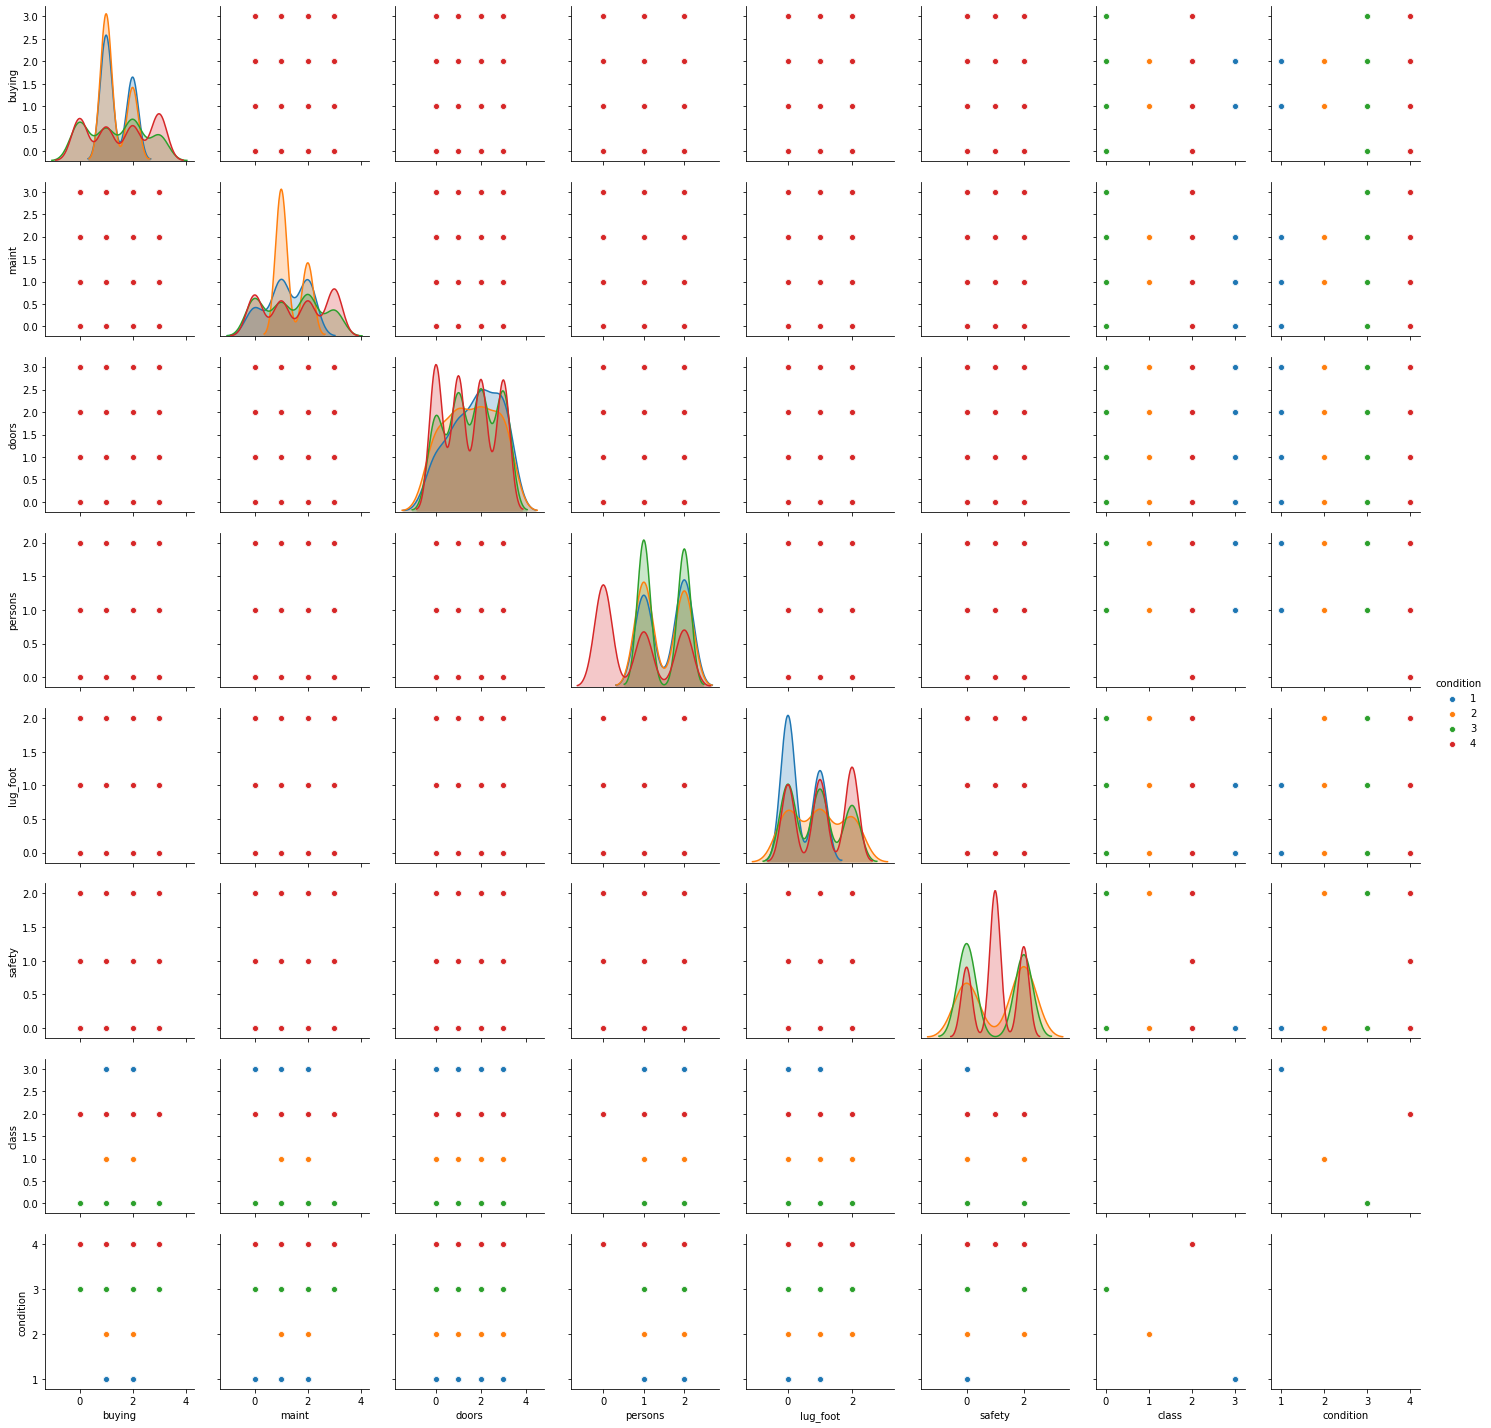

In [86]:
sns.pairplot(cv,hue='condition')
plt.show()

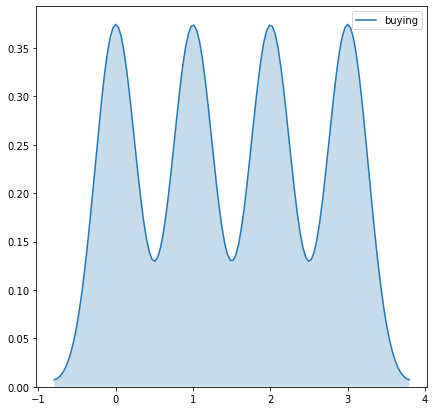

In [87]:
plt.figure(figsize=(7,7))
sns.kdeplot(cv['buying'],shade=True);

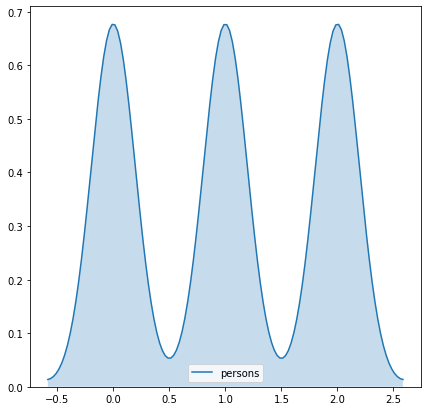

In [89]:
plt.figure(figsize=(7,7))
sns.kdeplot(cv['persons'],shade=True);

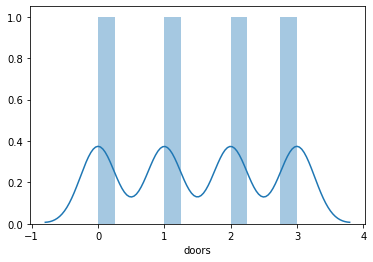

In [91]:
#checking skewness
sns.distplot(cv['doors'])

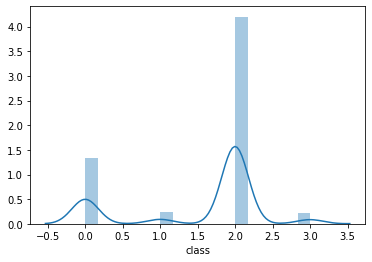

In [92]:
sns.distplot(cv['class'])

In [97]:
x=cv.drop('condition',axis=1)
y=cv['condition']

In [98]:
x.shape,y.shape

((1728, 7), (1728,))

In [99]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [102]:
from sklearn.preprocessing import MinMaxScaler
mx=MinMaxScaler()
x = mx.fit_transform(x)

In [103]:
#Train and Test data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.22, random_state = 42)

In [107]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1347, 7)
(381, 7)
(1347,)
(381,)


In [116]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
lg=LogisticRegression()
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier()
gnb=GaussianNB()
rfc=RandomForestClassifier()
models = []
models.append(('lg', LogisticRegression()))
models.append(('knn', KNeighborsClassifier()))
models.append(('dtc', DecisionTreeClassifier()))
models.append(('gnb', GaussianNB()))
models.append(('rfc',RandomForestClassifier()))

In [117]:
def my_model(models):
    models.fit(x_train,y_train)
    pred=models.predict(x_test)
    print(accuracy_score(y_test,pred)*100)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

In [118]:
my_model(lg)

92.1259842519685
[[  0   0   0  18]
 [  0   0   4   8]
 [  0   0  91   0]
 [  0   0   0 260]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        18
           2       0.00      0.00      0.00        12
           3       0.96      1.00      0.98        91
           4       0.91      1.00      0.95       260

    accuracy                           0.92       381
   macro avg       0.47      0.50      0.48       381
weighted avg       0.85      0.92      0.88       381



In [119]:
my_model(knn)

100.0
[[ 18   0   0   0]
 [  0  12   0   0]
 [  0   0  91   0]
 [  0   0   0 260]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        91
           4       1.00      1.00      1.00       260

    accuracy                           1.00       381
   macro avg       1.00      1.00      1.00       381
weighted avg       1.00      1.00      1.00       381



In [120]:
my_model(dtc)

100.0
[[ 18   0   0   0]
 [  0  12   0   0]
 [  0   0  91   0]
 [  0   0   0 260]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        91
           4       1.00      1.00      1.00       260

    accuracy                           1.00       381
   macro avg       1.00      1.00      1.00       381
weighted avg       1.00      1.00      1.00       381



In [121]:
my_model(rfc)

100.0
[[ 18   0   0   0]
 [  0  12   0   0]
 [  0   0  91   0]
 [  0   0   0 260]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        91
           4       1.00      1.00      1.00       260

    accuracy                           1.00       381
   macro avg       1.00      1.00      1.00       381
weighted avg       1.00      1.00      1.00       381



As we can see here almost all the 'ML' models are performing well with 100% accuracy rate.

# Grid Search CV

In [126]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    }     
}

In [127]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
scores = []
from sklearn.preprocessing import MinMaxScaler
mx=MinMaxScaler()
x= mx.fit_transform(x)




for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=10, return_train_score=False)
    clf.fit(x,y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df1= pd.DataFrame(scores,columns=['model','best_score','best_params'])
df1

,model,best_score,best_params
0,svm,1.000000,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,1.000000,{'n_estimators': 10}
2,logistic_regression,0.929977,{'C': 10}
3,naive_bayes_gaussian,1.000000,{}
4,naive_bayes_multinomial,0.700810,{}
5,decision_tree,1.000000,{'criterion': 'gini'}


After the application of grid search cv,we have got the result that 'svm','naive bayes' and decision tree performs well with 100% accuracy rate.

In [128]:
from sklearn.externals import joblib
#saving the model as pickl
joblib.dump(dtc,"Project 36_car evaluation.pkl")

['Project 36_car evaluation.pkl']

In [129]:
x= joblib.load("Project 36_car evaluation.pkl")

In [130]:
x.predict(x_test)

array(['4', '3', '4', '3', '4', '3', '4', '4', '4', '4', '1', '3', '4',
       '4', '4', '4', '4', '4', '4', '3', '4', '3', '3', '4', '3', '4',
       '4', '4', '4', '4', '3', '4', '4', '4', '3', '3', '2', '4', '4',
       '4', '4', '4', '3', '3', '3', '1', '4', '4', '4', '4', '4', '4',
       '3', '4', '4', '4', '4', '4', '4', '2', '4', '3', '4', '4', '3',
       '1', '4', '3', '3', '4', '4', '4', '4', '4', '3', '1', '4', '4',
       '4', '4', '1', '4', '4', '3', '1', '3', '4', '3', '1', '3', '4',
       '2', '4', '4', '4', '2', '4', '4', '4', '3', '4', '4', '4', '4',
       '3', '2', '3', '4', '4', '3', '4', '4', '4', '4', '4', '3', '2',
       '4', '4', '4', '4', '2', '4', '3', '3', '4', '3', '4', '4', '4',
       '4', '4', '3', '4', '4', '3', '4', '1', '4', '4', '4', '3', '3',
       '3', '4', '3', '4', '4', '4', '4', '3', '1', '4', '4', '4', '4',
       '4', '4', '4', '4', '4', '3', '4', '4', '4', '4', '3', '4', '3',
       '1', '3', '4', '3', '4', '4', '3', '4', '4', '4', '4', '3